# Predicting Customer Spending Behaviour in Streaming Services

## ADENIRAN ADEWUMI 

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report)
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
import scipy.cluster.hierarchy as shc
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [18]:
Streaming_df = pd.read_csv("Streaming.csv")
Streaming_df

,Customer_ID,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
0,CUST000001,56.0,Male,54,South,PayPal,0,9.0,6.42,319,62.11,1
1,CUST000002,69.0,Female,21,East,Debit Card,1,2.0,13.77,166,37.27,1
2,CUST000003,46.0,Female,49,East,PayPal,3,8.0,19.91,207,61.82,0
3,CUST000004,32.0,Male,47,West,Debit Card,3,1.0,13.39,108,40.96,1
4,CUST000005,60.0,Male,6,East,Credit Card,2,NaN,13.18,65,45.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST004996,24.0,Male,5,East,Debit Card,0,8.0,18.03,121,51.61,0
4996,CUST004997,66.0,Female,12,East,PayPal,3,5.0,5.84,192,36.32,0
4997,CUST004998,26.0,Female,1,East,Credit Card,2,8.0,6.76,354,42.07,1
4998,CUST004999,53.0,Female,44,South,Debit Card,1,10.0,5.95,31,60.09,0


In [19]:
df = pd.read_csv('Streaming.csv')

duplicates = df[df['Customer_ID'].duplicated()]
if not duplicates.empty:
    print("Warning: Found duplicate Customer_IDs:")
    print(duplicates['Customer_ID'].values)
    df = df.drop_duplicates(subset=['Customer_ID'], keep='first')

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

df['Satisfaction_Score'] = pd.to_numeric(df['Satisfaction_Score'], errors='coerce')
median_satisfaction = df['Satisfaction_Score'].median()
df['Satisfaction_Score'] = df['Satisfaction_Score'].fillna(median_satisfaction)

df['Monthly_Spend'] = pd.to_numeric(df['Monthly_Spend'], errors='coerce')
df['Discount_Offered'] = pd.to_numeric(df['Discount_Offered'], errors='coerce')
df['Last_Activity'] = pd.to_numeric(df['Last_Activity'], errors='coerce')
df['Churned'] = df['Churned'].astype(bool)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

df.to_csv('cleaned_streaming.csv', index=False)

print("\nBasic statistics of cleaned numerical columns:")
print(df.describe())

print(f"\nTotal records after cleaning: {len(df)}")


Missing values after cleaning:
Customer_ID               0
Age                       0
Gender                    0
Subscription_Length       0
Region                    0
Payment_Method            0
Support_Tickets_Raised    0
Satisfaction_Score        0
Discount_Offered          0
Last_Activity             0
Monthly_Spend             0
Churned                   0
dtype: int64

Basic statistics of cleaned numerical columns:
               Age  Subscription_Length  Support_Tickets_Raised  \
count  5000.000000          5000.000000             5000.000000   
mean     43.524000            29.704400                2.037000   
std      14.202287            17.050336                1.422405   
min      18.000000             1.000000                0.000000   
25%      32.000000            15.000000                1.000000   
50%      43.000000            29.000000                2.000000   
75%      55.000000            44.000000                3.000000   
max      69.000000            59.00

In [20]:
cleaned_streaming_df = pd.read_csv("cleaned_streaming.csv")
cleaned_streaming_df

,Customer_ID,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
0,CUST000001,56.0,Male,54,South,PayPal,0,9.0,6.42,319,62.11,True
1,CUST000002,69.0,Female,21,East,Debit Card,1,2.0,13.77,166,37.27,True
2,CUST000003,46.0,Female,49,East,PayPal,3,8.0,19.91,207,61.82,False
3,CUST000004,32.0,Male,47,West,Debit Card,3,1.0,13.39,108,40.96,True
4,CUST000005,60.0,Male,6,East,Credit Card,2,6.0,13.18,65,45.97,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST004996,24.0,Male,5,East,Debit Card,0,8.0,18.03,121,51.61,False
4996,CUST004997,66.0,Female,12,East,PayPal,3,5.0,5.84,192,36.32,False
4997,CUST004998,26.0,Female,1,East,Credit Card,2,8.0,6.76,354,42.07,True
4998,CUST004999,53.0,Female,44,South,Debit Card,1,10.0,5.95,31,60.09,False


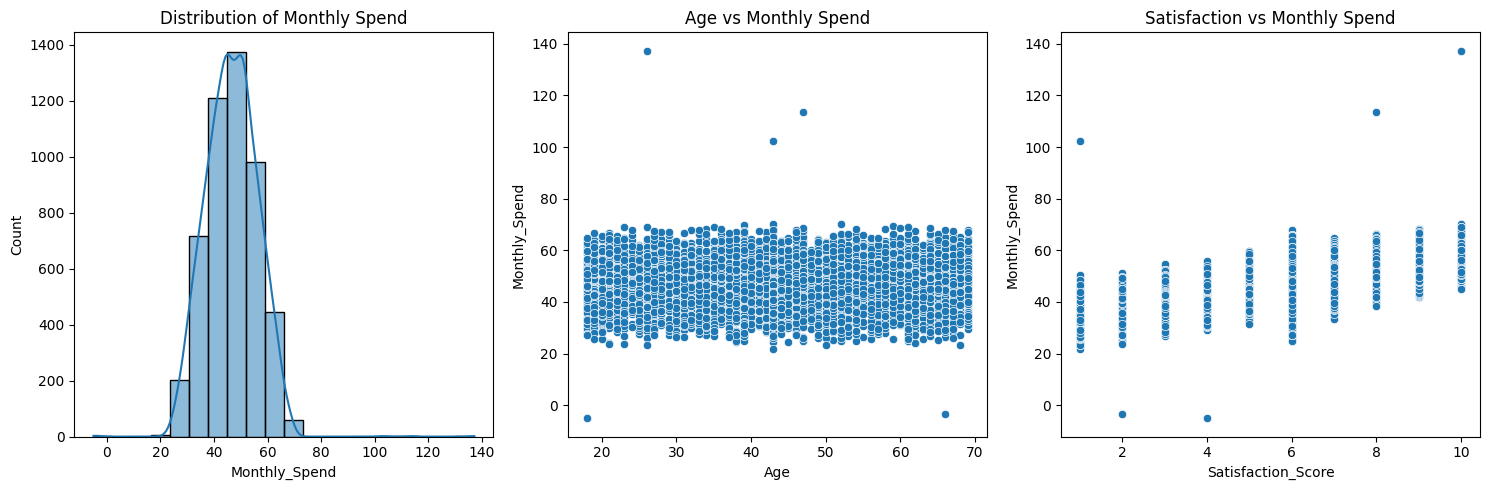

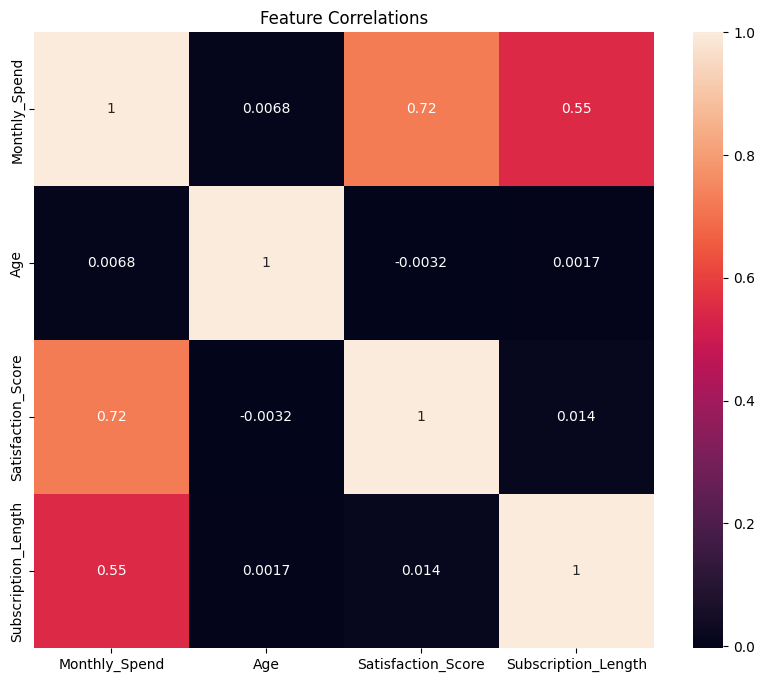


Simple Linear Regression Results:
Mean Absolute Error: 7.64
Root Mean Squared Error: 9.51
R2 Score: -0.00

Polynomial Regression Results:
R2 Score: -0.00

Multiple Linear Regression Results:
R2 Score: 0.82

Classification Results:
              precision    recall  f1-score   support

       False       0.80      0.94      0.86       545
        True       0.92      0.71      0.80       455

    accuracy                           0.84      1000
   macro avg       0.86      0.83      0.83      1000
weighted avg       0.85      0.84      0.83      1000



<Figure size 800x600 with 0 Axes>

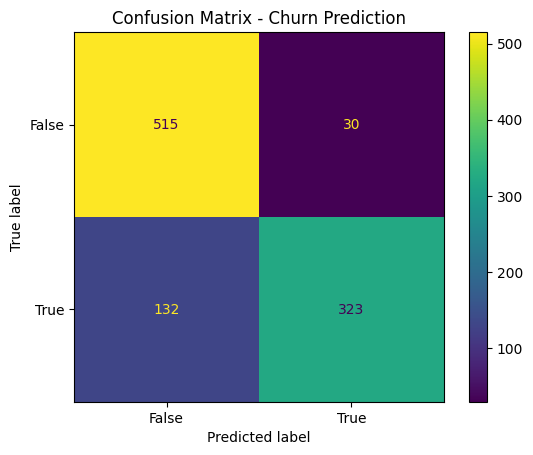

In [21]:
df = pd.read_csv('cleaned_streaming.csv')

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Monthly_Spend'], bins=20, kde=True)
plt.title('Distribution of Monthly Spend')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Age', y='Monthly_Spend')
plt.title('Age vs Monthly Spend')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Satisfaction_Score', y='Monthly_Spend')
plt.title('Satisfaction vs Monthly Spend')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
features = ['Monthly_Spend', 'Age', 'Satisfaction_Score', 'Subscription_Length']
sns.heatmap(df[features].corr(), annot=True)
plt.title('Feature Correlations')
plt.show()

X = df['Age'].to_numpy().reshape(-1, 1)
y = df['Monthly_Spend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nSimple Linear Regression Results:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)

print("\nPolynomial Regression Results:")
print(f"R2 Score: {r2_score(y_test, y_pred_poly):.2f}")

features_multi = ['Age', 'Satisfaction_Score', 'Subscription_Length']
X_multi = df[features_multi]
y_multi = df['Monthly_Spend']

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42)

scaler_multi = StandardScaler()
X_train_multi_scaled = scaler_multi.fit_transform(X_train_multi)
X_test_multi_scaled = scaler_multi.transform(X_test_multi)

model_multi = LinearRegression()
model_multi.fit(X_train_multi_scaled, y_train_multi)

print("\nMultiple Linear Regression Results:")
print(f"R2 Score: {r2_score(y_test_multi, model_multi.predict(X_test_multi_scaled)):.2f}")

X_class = df[['Monthly_Spend', 'Satisfaction_Score', 'Support_Tickets_Raised']]
y_class = df['Churned']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42)

scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

knn = KNeighborsClassifier()
knn.fit(X_train_class_scaled, y_train_class)
y_pred_class = knn.predict(X_test_class_scaled)

print("\nClassification Results:")
print(classification_report(y_test_class, y_pred_class))

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test_class, y_pred_class)
plt.title('Confusion Matrix - Churn Prediction')
plt.show()

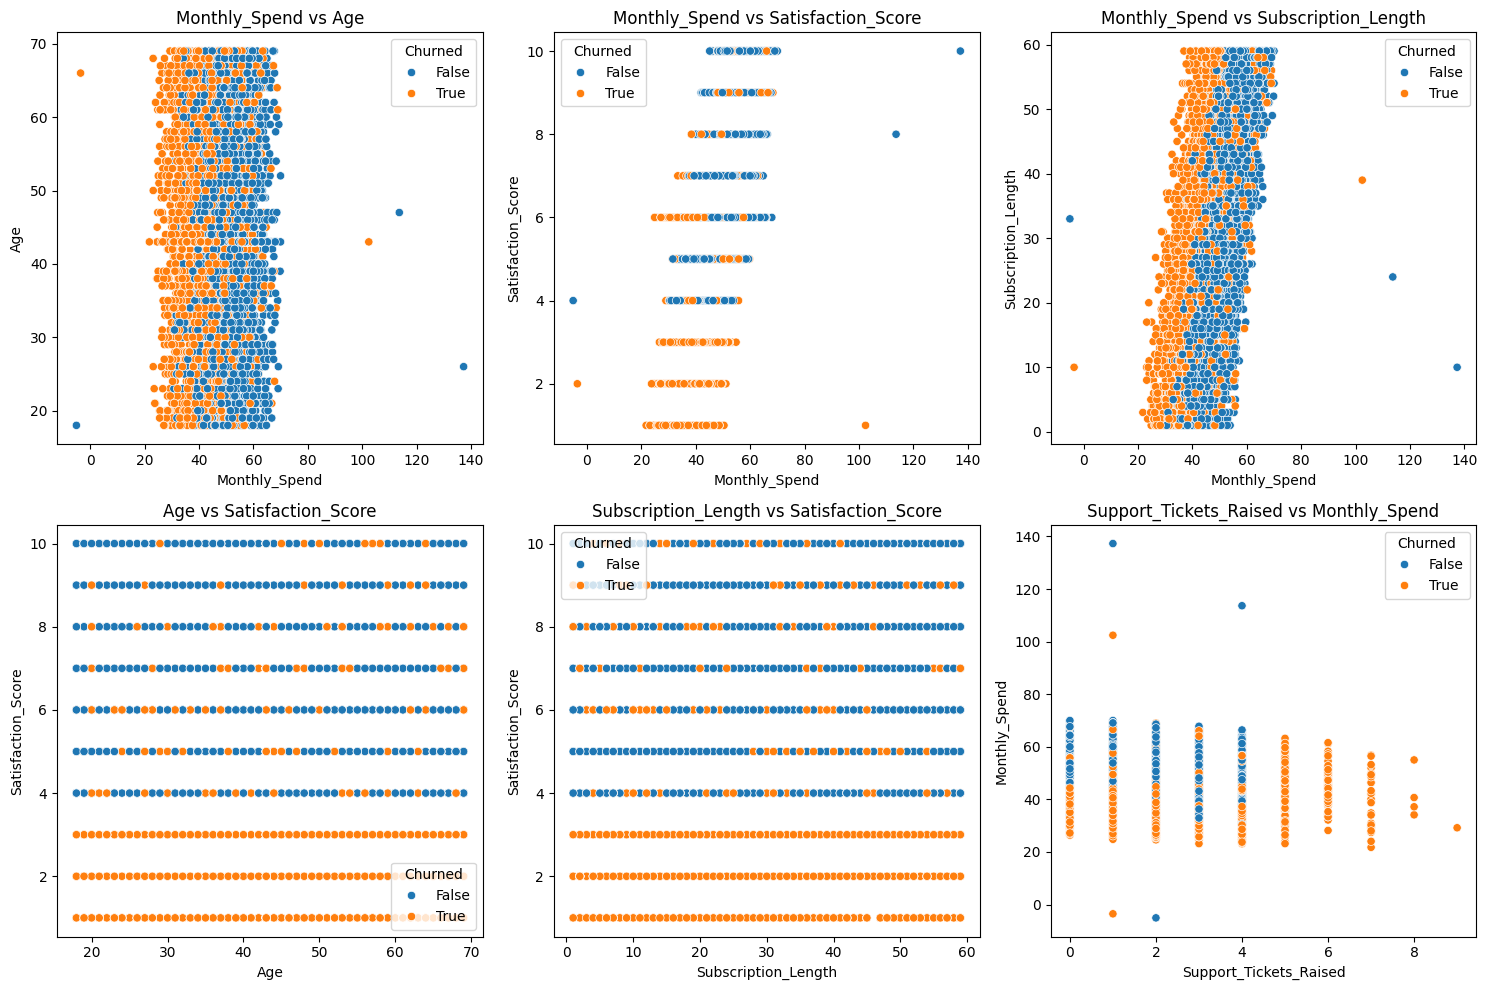

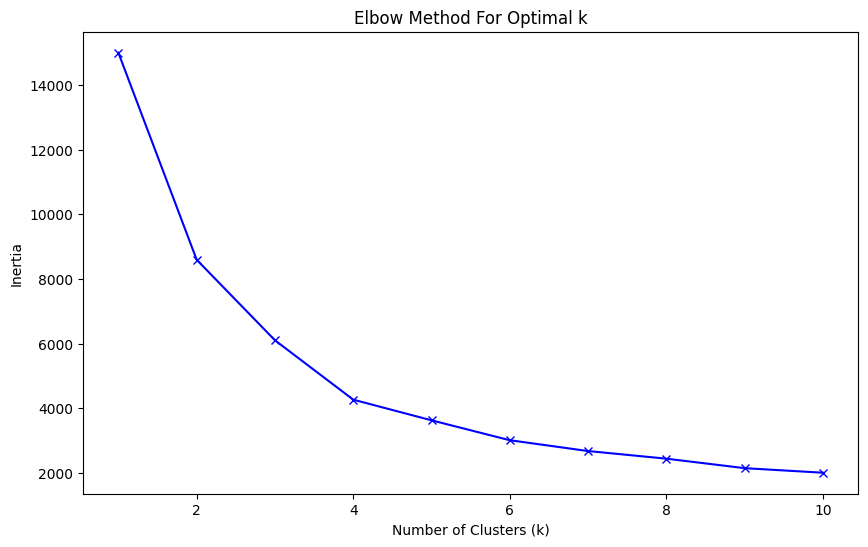


K-Means Clustering Metrics:
Davies-Bouldin Index: 0.96
Silhouette Score: 0.35


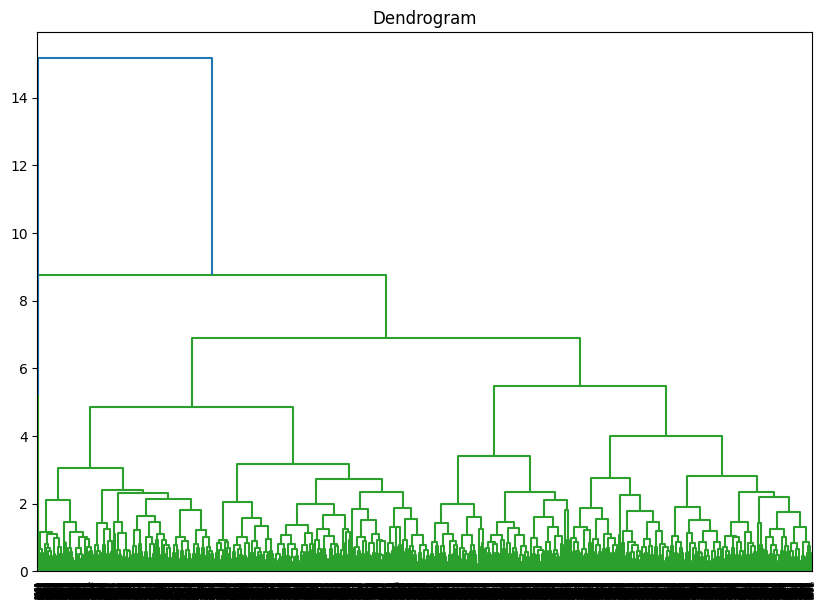


Hierarchical Clustering Metrics:
Davies-Bouldin Index: 0.47
Silhouette Score: 0.59

DBSCAN Clustering Metrics:
Davies-Bouldin Index: 3.75
Silhouette Score: -0.17


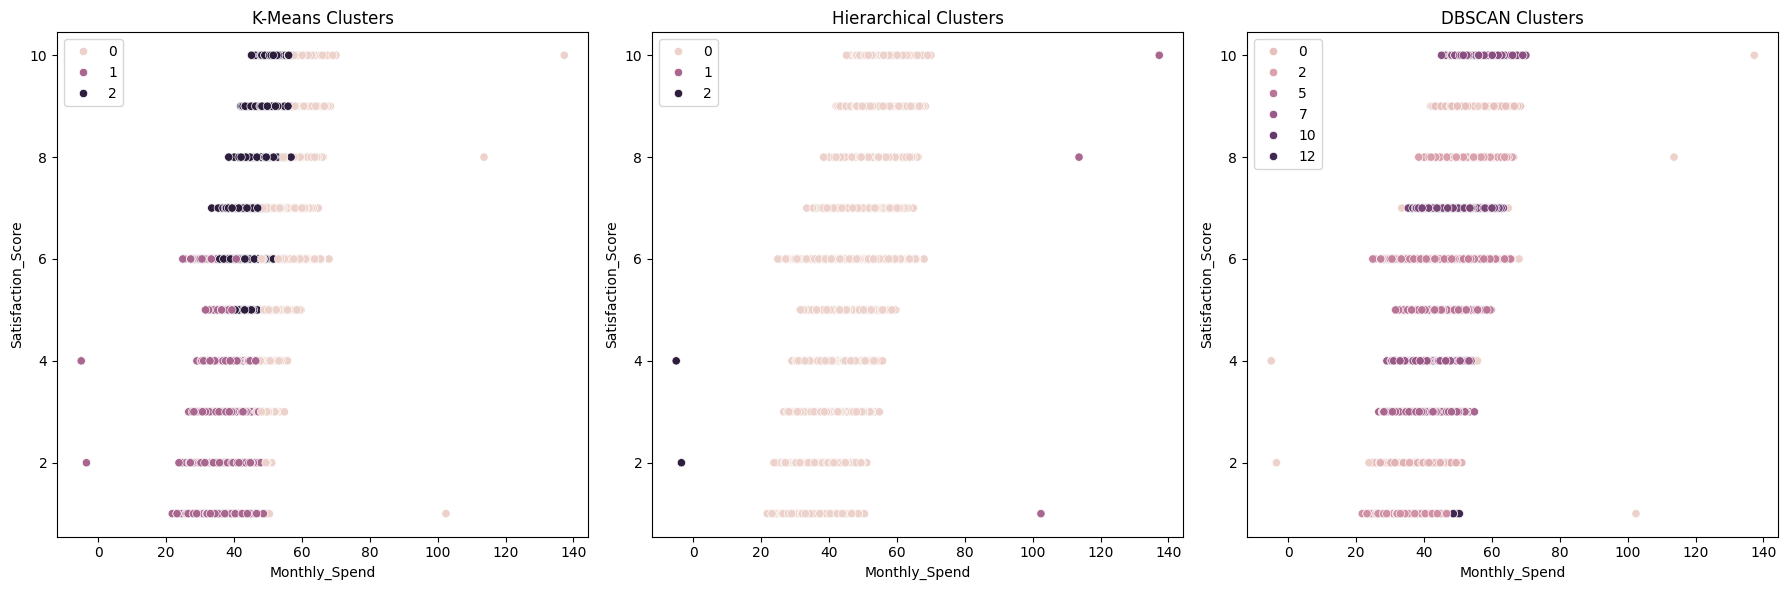


Cluster Characteristics:

K-Means Cluster 0 Statistics:
       Monthly_Spend  Satisfaction_Score  Subscription_Length
count        1692.00             1692.00              1692.00
mean           55.61                6.95                46.24
std             6.38                2.03                 8.49
min            37.26                1.00                10.00
25%            50.93                6.00                39.00
50%            55.41                7.00                47.00
75%            59.80                9.00                54.00
max           137.31               10.00                59.00

K-Means Cluster 1 Statistics:
       Monthly_Spend  Satisfaction_Score  Subscription_Length
count        1804.00             1804.00              1804.00
mean           37.53                2.76                25.71
std             5.68                1.45                15.52
min            -5.06                1.00                 1.00
25%            33.58                2.00    

In [22]:
df = pd.read_csv('cleaned_streaming.csv')

plt.figure(figsize=(15, 10))

plot_pairs = [
    ('Monthly_Spend', 'Age'),
    ('Monthly_Spend', 'Satisfaction_Score'),
    ('Monthly_Spend', 'Subscription_Length'),
    ('Age', 'Satisfaction_Score'),
    ('Subscription_Length', 'Satisfaction_Score'),
    ('Support_Tickets_Raised', 'Monthly_Spend')
]

for idx, (x, y) in enumerate(plot_pairs, 1):
    plt.subplot(2, 3, idx)
    sns.scatterplot(data=df, x=x, y=y, hue='Churned')
    plt.title(f'{x} vs {y}')

plt.tight_layout()
plt.show()

features = ['Monthly_Spend', 'Satisfaction_Score', 'Subscription_Length']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

kmeans_db = davies_bouldin_score(X_scaled, kmeans_labels)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

print("\nK-Means Clustering Metrics:")
print(f"Davies-Bouldin Index: {kmeans_db:.2f}")
print(f"Silhouette Score: {kmeans_silhouette:.2f}")

hierarchy_model = AgglomerativeClustering(n_clusters=3, linkage='complete')
hierarchy_labels = hierarchy_model.fit_predict(X_scaled)

plt.figure(figsize=(10, 7))
dendrogram = shc.dendrogram(shc.linkage(X_scaled, method='complete'))
plt.title('Dendrogram')
plt.show()

hierarchy_db = davies_bouldin_score(X_scaled, hierarchy_labels)
hierarchy_silhouette = silhouette_score(X_scaled, hierarchy_labels)

print("\nHierarchical Clustering Metrics:")
print(f"Davies-Bouldin Index: {hierarchy_db:.2f}")
print(f"Silhouette Score: {hierarchy_silhouette:.2f}")

dbscan = DBSCAN(eps=0.2, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_scaled)

valid_points = dbscan_labels != -1
if len(np.unique(dbscan_labels[valid_points])) > 1:
    dbscan_db = davies_bouldin_score(X_scaled[valid_points], dbscan_labels[valid_points])
    dbscan_silhouette = silhouette_score(X_scaled[valid_points], dbscan_labels[valid_points])
    
    print("\nDBSCAN Clustering Metrics:")
    print(f"Davies-Bouldin Index: {dbscan_db:.2f}")
    print(f"Silhouette Score: {dbscan_silhouette:.2f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=df, x='Monthly_Spend', y='Satisfaction_Score', 
                hue=kmeans_labels, ax=axes[0])
axes[0].set_title('K-Means Clusters')

sns.scatterplot(data=df, x='Monthly_Spend', y='Satisfaction_Score', 
                hue=hierarchy_labels, ax=axes[1])
axes[1].set_title('Hierarchical Clusters')

sns.scatterplot(data=df, x='Monthly_Spend', y='Satisfaction_Score', 
                hue=dbscan_labels, ax=axes[2])
axes[2].set_title('DBSCAN Clusters')

plt.tight_layout()
plt.show()

df['KMeans_Cluster'] = kmeans_labels
df['Hierarchical_Cluster'] = hierarchy_labels
df['DBSCAN_Cluster'] = dbscan_labels

print("\nCluster Characteristics:")
for cluster in range(3):
    print(f"\nK-Means Cluster {cluster} Statistics:")
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    print(cluster_data[features].describe().round(2))


Random Forest Regressor Results:
Mean Squared Error (MSE): 16.59
R² Score: 0.82

Feature Importances:
                      Feature  Importance
1          Satisfaction_Score    0.517574
2         Subscription_Length    0.324598
4               Last_Activity    0.043969
3      Support_Tickets_Raised    0.043050
0                         Age    0.038701
7                Region_South    0.006206
5                 Gender_Male    0.005591
10      Payment_Method_PayPal    0.005540
8                 Region_West    0.005151
9   Payment_Method_Debit Card    0.004959
6                Region_North    0.004661


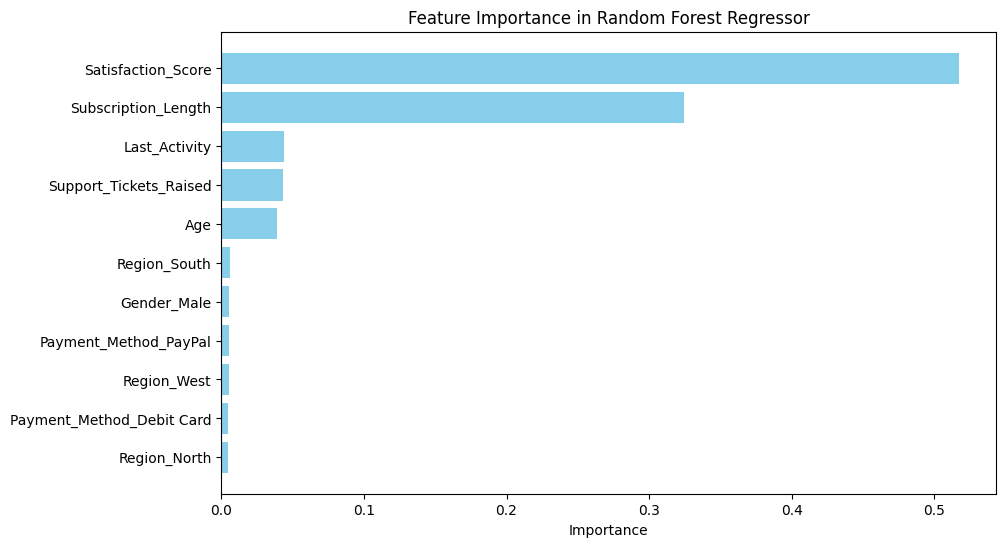

In [23]:
df = pd.read_csv('cleaned_streaming.csv')

numerical_features = ['Age', 'Satisfaction_Score', 'Subscription_Length', 'Support_Tickets_Raised', 'Last_Activity']
categorical_features = ['Gender', 'Region', 'Payment_Method']
target = 'Monthly_Spend'

X = df[numerical_features + categorical_features]
y = df[target]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_preprocessed, y_train)

y_pred = rf_model.predict(X_test_preprocessed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRandom Forest Regressor Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance in Random Forest Regressor')
plt.xlabel('Importance')
plt.show()


ANN Model Performance (Scikit-learn):
Mean Squared Error (MSE): 15.48
R² Score: 0.83


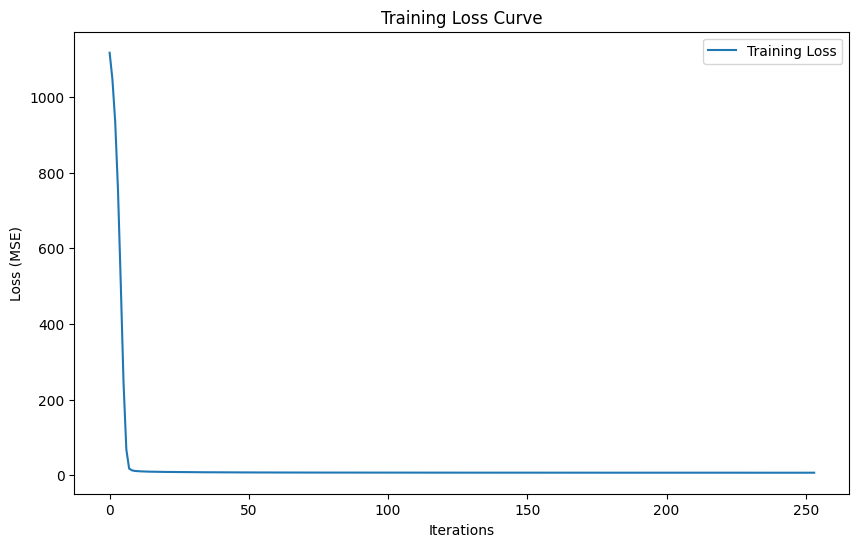

In [24]:
df = pd.read_csv('cleaned_streaming.csv')

X = df[['Age', 'Satisfaction_Score', 'Subscription_Length', 
        'Support_Tickets_Raised', 'Last_Activity', 'Gender', 
        'Region', 'Payment_Method']]
y = df['Monthly_Spend']

categorical_columns = ['Gender', 'Region', 'Payment_Method']
numerical_columns = ['Age', 'Satisfaction_Score', 'Subscription_Length', 
                     'Support_Tickets_Raised', 'Last_Activity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),  
    activation='relu',           
    solver='adam',              
    max_iter=500,                
    random_state=42
)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nANN Model Performance (Scikit-learn):")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss Curve')
plt.legend()
plt.show()


ANN Model Performance (Scikit-learn):
Mean Squared Error (MSE): 15.48
R² Score: 0.83


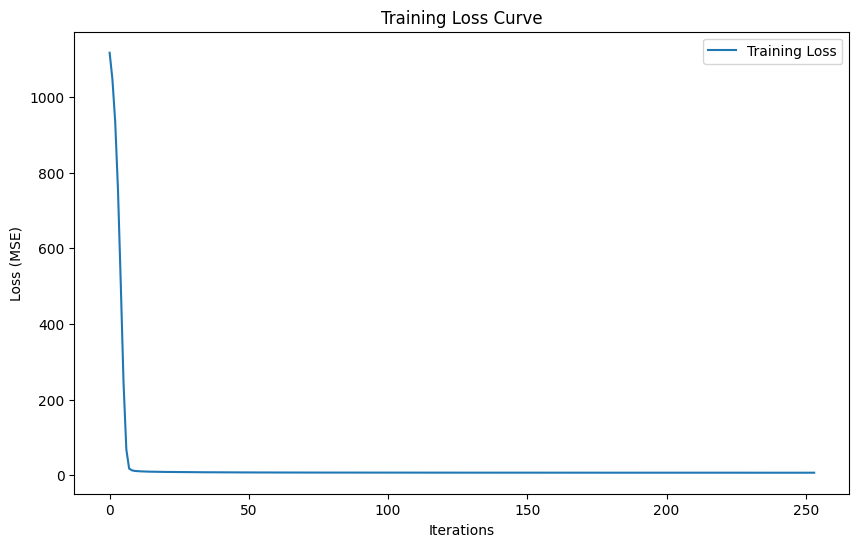

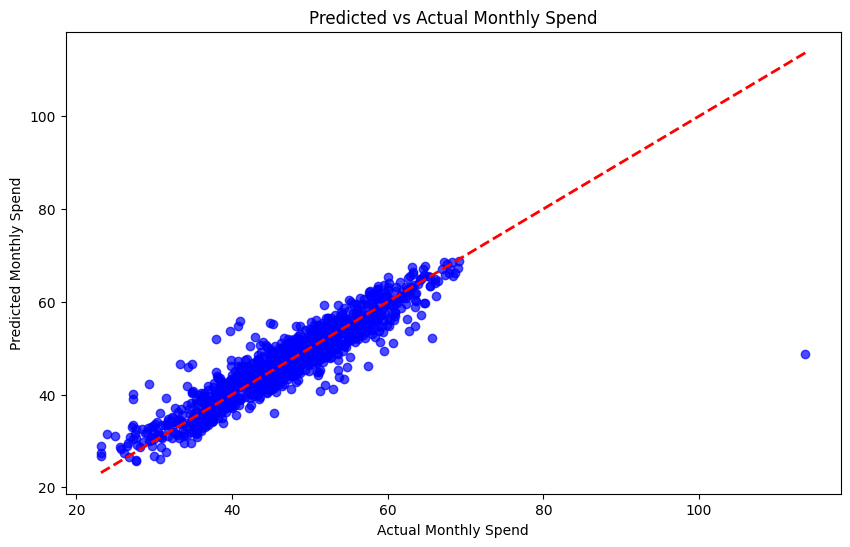

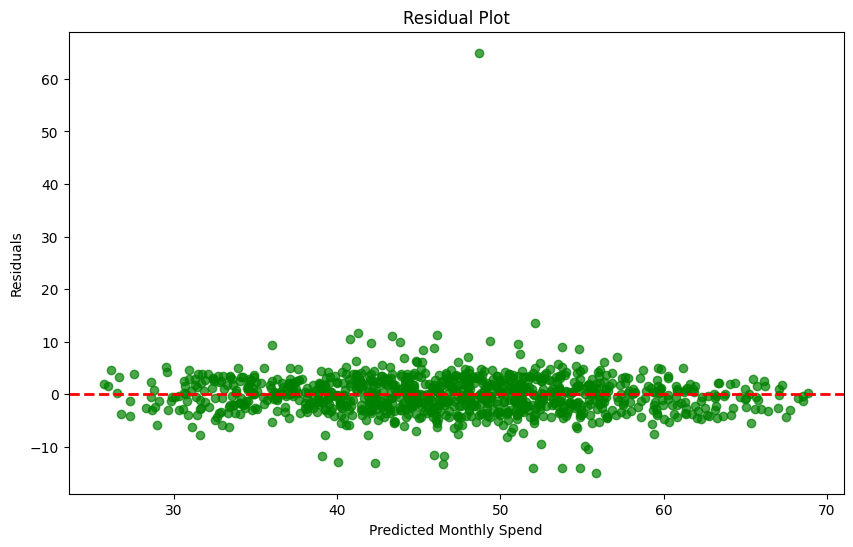

In [25]:
df = pd.read_csv('cleaned_streaming.csv')

X = df[['Age', 'Satisfaction_Score', 'Subscription_Length', 
        'Support_Tickets_Raised', 'Last_Activity', 'Gender', 
        'Region', 'Payment_Method']]
y = df['Monthly_Spend']

categorical_columns = ['Gender', 'Region', 'Payment_Method']
numerical_columns = ['Age', 'Satisfaction_Score', 'Subscription_Length', 
                     'Support_Tickets_Raised', 'Last_Activity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)


mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),  # Two hidden layers with 64 and 32 neurons
    activation='relu',           # ReLU activation function
    solver='adam',               # Adam optimizer
    max_iter=500,                # Maximum number of iterations
    random_state=42
)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nANN Model Performance (Scikit-learn):")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Monthly Spend')
plt.ylabel('Predicted Monthly Spend')
plt.title('Predicted vs Actual Monthly Spend')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Monthly Spend')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

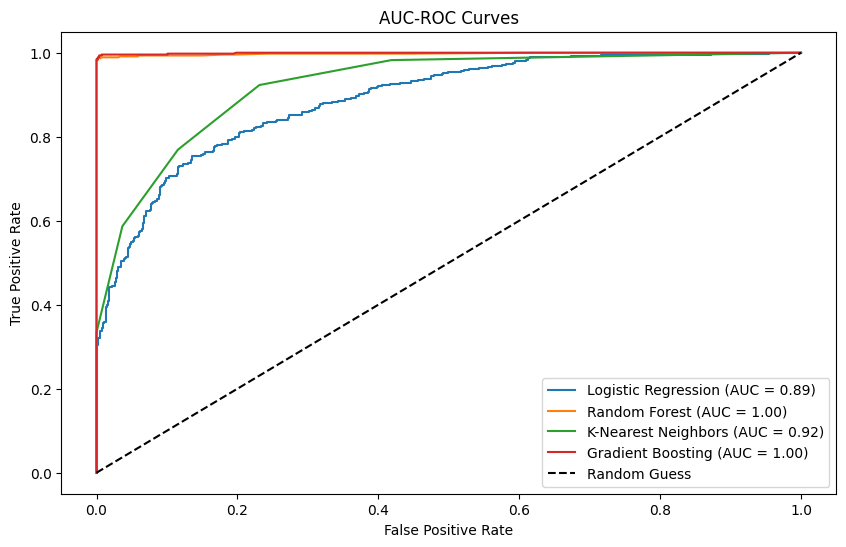

In [26]:
df = pd.read_csv('cleaned_streaming.csv')


X = df[['Age', 'Satisfaction_Score', 'Subscription_Length', 
        'Support_Tickets_Raised', 'Last_Activity', 'Monthly_Spend', 
        'Gender', 'Region', 'Payment_Method']]
y = df['Churned']

categorical_columns = ['Gender', 'Region', 'Payment_Method']
numerical_columns = ['Age', 'Satisfaction_Score', 'Subscription_Length', 
                     'Support_Tickets_Raised', 'Last_Activity', 'Monthly_Spend']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
   
    report = classification_report(y_test, y_pred, output_dict=True)
    auc_roc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    precision = report["1"]["precision"] if "1" in report else 0.0
    recall = report["1"]["recall"] if "1" in report else 0.0
    f1_score = report["1"]["f1-score"] if "1" in report else 0.0
    
    results[model_name] = {
        "Accuracy": report["accuracy"],
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "AUC-ROC": auc_roc
    }


plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curves")
plt.legend()
plt.show()

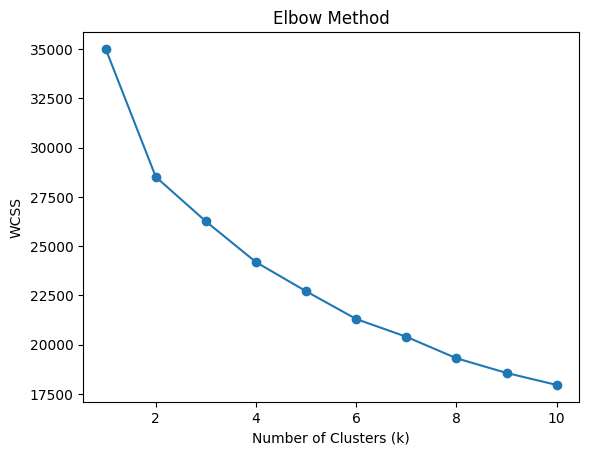

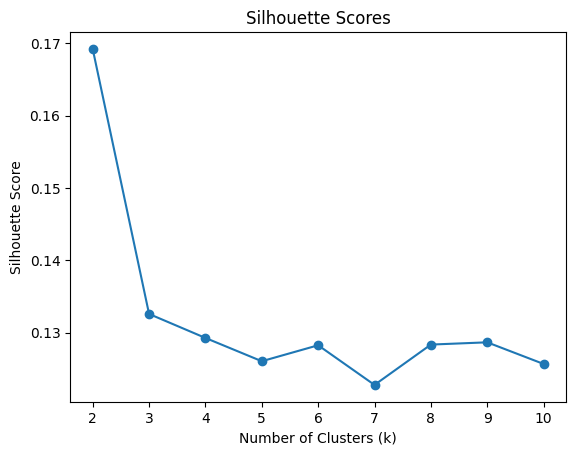

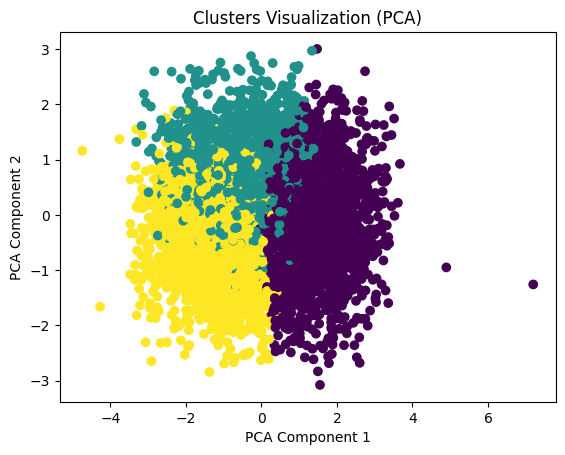

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('cleaned_streaming.csv')

# Preprocessing: Standardize the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score for different k values
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# Plot Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Apply k-Means with the optimal k (e.g., k=3 based on the Elbow Method and Silhouette Score)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Cluster Centroids:
        Age  Satisfaction_Score  Subscription_Length  Support_Tickets_Raised  \
0 -0.076084            0.842405             0.478141               -0.130801   
1  0.248508           -0.507658            -0.247697                0.168774   
2 -0.129001           -0.580071            -0.365444                0.009558   

   Discount_Offered  Last_Activity  Monthly_Spend  
0          0.022674       0.001422       0.943218  
1          0.916497       0.144225      -0.342114  
2         -0.848169      -0.130837      -0.852041  

Feature Variance Across Clusters:
Monthly_Spend             0.855842
Discount_Offered          0.778555
Satisfaction_Score        0.641892
Subscription_Length       0.208724
Age                       0.041779
Support_Tickets_Raised    0.022466
Last_Activity             0.018924
dtype: float64


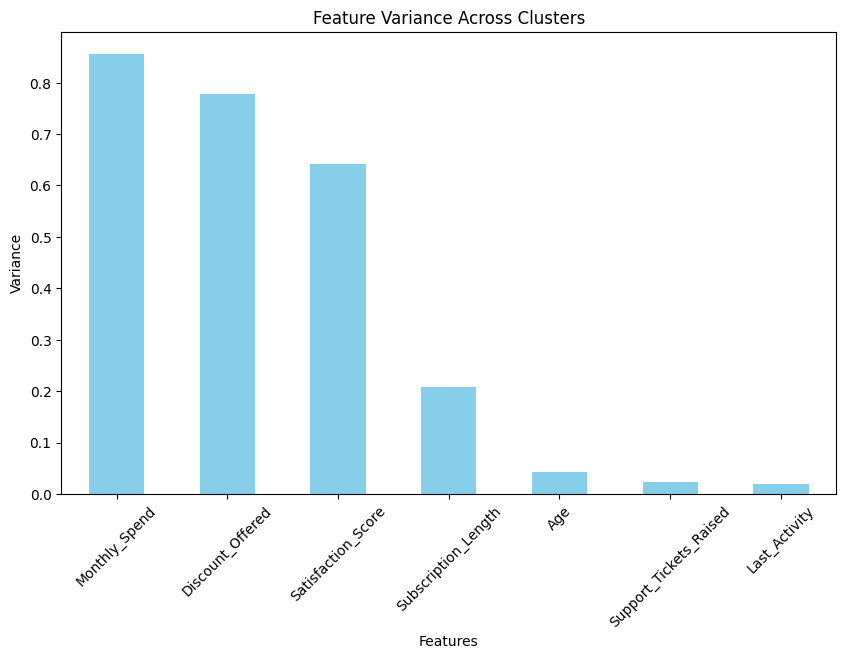

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('cleaned_streaming.csv')

# Preprocessing: Select relevant features and standardize numerical data
features = ['Age', 'Satisfaction_Score', 'Subscription_Length', 
            'Support_Tickets_Raised', 'Discount_Offered', 'Last_Activity', 'Monthly_Spend']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Apply k-Means with the optimal number of clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze cluster centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("Cluster Centroids:")
print(centroids)

# Calculate feature variance across clusters
feature_variance = centroids.var(axis=0).sort_values(ascending=False)
print("\nFeature Variance Across Clusters:")
print(feature_variance)

# Visualize the most meaningful features
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
feature_variance.plot(kind='bar', color='skyblue')
plt.title('Feature Variance Across Clusters')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(rotation=45)
plt.show()

In [30]:
data = pd.read_csv('cleaned_streaming.csv')
features = ['Age', 'Satisfaction_Score', 'Subscription_Length', 
            'Support_Tickets_Raised', 'Monthly_Spend']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

hierarchical = AgglomerativeClustering(n_clusters=3, linkage='complete')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

metrics = pd.DataFrame(columns=['k-Means', 'Hierarchical'])

# Silhouette Score (higher is better)
metrics.loc['Silhouette Score'] = [
    silhouette_score(X_scaled, kmeans_labels),
    silhouette_score(X_scaled, hierarchical_labels)
]

# Davies-Bouldin Index (lower is better)
metrics.loc['Davies-Bouldin Index'] = [
    davies_bouldin_score(X_scaled, kmeans_labels),
    davies_bouldin_score(X_scaled, hierarchical_labels)
]

# Calinski-Harabasz Index (higher is better)
metrics.loc['Calinski-Harabasz Index'] = [
    calinski_harabasz_score(X_scaled, kmeans_labels),
    calinski_harabasz_score(X_scaled, hierarchical_labels)
]

print("\nClustering Algorithm Comparison:")
print(metrics)


Clustering Algorithm Comparison:
                             k-Means  Hierarchical
Silhouette Score            0.189990      0.099318
Davies-Bouldin Index        1.685015      1.870818
Calinski-Harabasz Index  1344.451247    273.752059
